# Vamos a generar nuestro primer modelo de ML #

Vamos a construir un modelo de ML que prediga dado los datos de un equipos (puntos, goles, etc) la posición en la tabla.

Para ello vamos a 


 - Load : Cargar el csv en un DataFrame
 - Preprocessing : Poner el campo posición, y eliminar columnas que no queremos.
 - Split : Partir el dataset en 4 partes : train_X, train_y, test_X y test_y 
 - Train: Entrenar el modelo.
 - Visualize: Visualizar los resultados
 


## Load : Cargar el csv en un DataFrame


In [1]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import html5lib
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn                  import svm ,  metrics
from sklearn.metrics          import mean_squared_error

#df = pd.read_html("http://www.mundodeportivo.com/resultados/futbol/laliga/clasificacion.html")[0]


df = pd.read_csv("datasets/equipos.csv")

df

/Users/jaimevalero/miniconda3/envs/flask/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Equipo,PJ,PG,PE,PP,GF,GC,DIF,PTS
0,Barcelona,36,27,9,0,94,24,70,90
1,Atlético Madrid,36,22,9,5,55,20,35,75
2,Real Madrid,36,21,9,6,86,42,44,72
3,Valencia,36,20,7,9,62,37,25,67
4,Betis,36,18,5,13,56,56,0,59
5,Villarreal,36,17,6,13,51,46,5,57
6,Sevilla,36,16,6,14,46,56,-10,54
7,Getafe,36,14,10,12,41,32,9,52
8,Girona,36,13,9,14,48,57,-9,48
9,Eibar,36,13,8,15,41,48,-7,47


## Preprocessing : Poner el campo posición, y eliminar columnas que no queremos. ##


In [2]:

# Quitamos los atributos que nos sobrean para hacer la predicción , nombre del equipo y partidos jugadas
df["Posicion"] = range(1,21)

try:
  del df["Equipo"]
  del df["PJ"]
except: pass



In [3]:
#  Ponemos las lables que queremos predecir

df['Posicion'].iloc[4:6]     = "Europa League"
df['Posicion'].iloc[0:4]     = "Champions League"
df['Posicion'].iloc[16:20]   = "Descenso"
df['Posicion'].iloc[6:16]    = "Zona fria"

df

,PG,PE,PP,GF,GC,DIF,PTS,Posicion
0,27,9,0,94,24,70,90,Champions League
1,22,9,5,55,20,35,75,Champions League
2,21,9,6,86,42,44,72,Champions League
3,20,7,9,62,37,25,67,Champions League
4,18,5,13,56,56,0,59,Europa League
5,17,6,13,51,46,5,57,Europa League
6,16,6,14,46,56,-10,54,Zona fria
7,14,10,12,41,32,9,52,Zona fria
8,13,9,14,48,57,-9,48,Zona fria
9,13,8,15,41,48,-7,47,Zona fria


## Split : Partir el dataset en 4 partes : train_X, train_y, test_X y test_y  ##

Separamos el dataset en train and test, y en features y labels

 - Las filas **train** son para entrenar el sistema.

 - Las filas **test** son para comprobar que el modelo funciona bien.
<br>

 <div class="alert alert-block alert-info">
Al conjunto de columnas que usamos como entrada para el el modelo ** features ** , se le suele denominar **X** (en mayúscula).
<br>
A la columna que queremos predecir **label** , se suele llamar **y** (en minúscula).
</div>

<img style="float: left;" src="images/dataset-1.png">





In [4]:



import pandas as pd
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Lo partimos en las 4 partes anteriores.
# Primero en dos partes aleatorias en proporcion 25%, 75%
train, test = train_test_split(df, test_size = 0.25)



# A su vez, el train lo partimos en dos
# train_X con las labels que vamos a usar para entrenar
# train_Y con la predicción que vamos a hacer

train_X = train[["PG","PE","PP","GF","GC","DIF","PTS"]]
train_y = train.Posicion

# Tambien partimos en dos los tests
test_X  = test[[ "PG","PE","PP","GF","GC","DIF","PTS"]]
test_y  = test.Posicion

print ("   train_X es:\n " , train_X  )
print ("\n train_y es:\n " , train_y  )
print ("\n test_X es:\n " ,  test_X  )
print ("\n test_y es:\n " ,  test_y  )



   train_X es:
      PG  PE  PP  GF  GC  DIF  PTS
16  11   7  18  29  46  -17   40
15  10  13  13  37  50  -13   43
11  12  10  14  55  52    3   46
14  10  13  13  31  41  -10   43
8   13   9  14  48  57   -9   48
19   5   5  26  23  56  -33   20
12  14   2  20  37  48  -11   44
7   14  10  12  41  32    9   52
3   20   7   9  62  37   25   67
10  13   7  16  63  56    7   46
18   5   7  24  23  71  -48   22
0   27   9   0  94  24   70   90
5   17   6  13  51  46    5   57
2   21   9   6  86  42   44   72
6   16   6  14  46  56  -10   54

 train_y es:
  16            Descenso
15           Zona fria
11           Zona fria
14           Zona fria
8            Zona fria
19            Descenso
12           Zona fria
7            Zona fria
3     Champions League
10           Zona fria
18            Descenso
0     Champions League
5        Europa League
2     Champions League
6            Zona fria
Name: Posicion, dtype: object

 test_X es:
      PG  PE  PP  GF  GC  DIF  PTS
9   13   8  15  

## Train: Entrenar un modelo. ##

 <div class="alert alert-block alert-info">
Para verificar la bondad de un modelo, usamos el accuracy_score si la variable es categórica.
<br>

Si la variable es continua, calculamos la media de errores cuadráticos, entre los valores predichos por el modelo, y los reales.
</div>


In [5]:
from sklearn import svm
from sklearn.metrics import mean_squared_error

# Definimos un modelo
model = svm.SVC()

# Entrenamos el modelo
model.fit(train_X,train_y)

# Predecimos, para comprobar si el modelo es bueno.
prediction = model.predict(test_X)
print ("\n test_y es:\n "     ,  test_y  )
print ("\n prediction es:\n " ,  prediction  )

print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))

# Si la variable a predecir fuera continua (número), lugar de categórica, usariamos esta funcion
# print('The accuracy of the model is:',mean_squared_error(test_y, prediction))


 test_y es:
  9            Zona fria
13           Zona fria
17            Descenso
1     Champions League
4        Europa League
Name: Posicion, dtype: object

 prediction es:
  ['Zona fria' 'Zona fria' 'Zona fria' 'Zona fria' 'Zona fria']
The accuracy of the SVM is: 0.4


## Visualize results. Visualizamos el clasificador ##

 <div class="alert alert-block alert-info">
 Es muy útil saber visualizar los clasificadores, para comparar los algoritmos, o el mismo algoritmo con diferentes hyperparámetros.
 
<br>

[[ 70  90]
 [ 35  75]
 [ 44  72]
 [ 25  67]
 [  0  59]
 [  5  57]
 [-10  54]
 [  9  52]
 [ -9  48]
 [ -7  47]
 [  7  46]
 [  3  46]
 [-11  44]
 [ -5  43]
 [-10  43]
 [-13  43]
 [-17  40]
 [-35  29]
 [-48  22]
 [-33  20]]
[0 0 0 0 2 2 3 3 3 3 3 3 3 3 3 3 1 1 1 1]


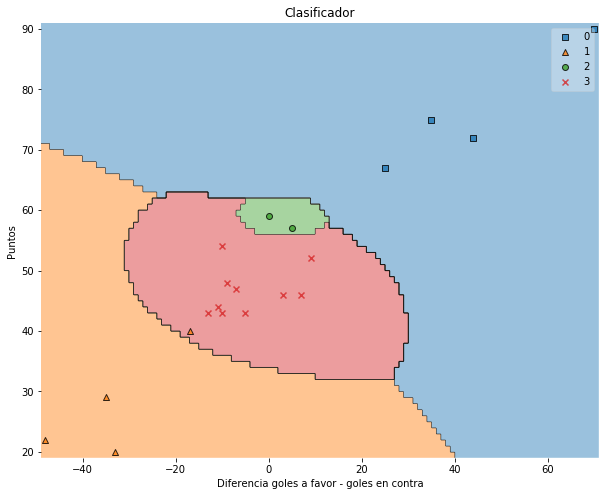

In [7]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier



# Transformamos de una cadena con la posicion, a un array de numpy numerico
from sklearn.preprocessing import LabelEncoder

X = df[[ "DIF","PTS"]].values
y = df["Posicion"]
le = LabelEncoder()
y2 = le.fit_transform(y)

print(X)
print(y2)


#model = svm.SVC() 
#model = LogisticRegression(random_state=1)
model = GaussianNB()
clf=model
clf.fit(X, y2)

# Generamos el gráfico
fig = plt.figure(figsize=(10,8))
fig = plot_decision_regions(X=X, y=y2, clf=clf)
fig.set_ylabel ( "Puntos")
fig.set_xlabel ( "Diferencia goles a favor - goles en contra")

plt.title("Clasificador")


## Visualize results. Matriz de confusion ##


In [8]:
# Imprimimos la matriz de confusin
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix
import matplotlib.pyplot as plt
cm = ConfusionMatrix(y_true=test_y, y_pred=prediction)

print("La  matriz de confusion es :\n" )
print(cm )

print("\nLos detalles de la clasificacion son :\n" )


from sklearn.metrics import classification_report
print(classification_report(y_true=test_y, y_pred=prediction))
   
    

La  matriz de confusion es :

Predicted         Champions League  Europa League  Zona fria  __all__
Actual                                                               
Champions League                 0              0          1        1
Europa League                    0              0          1        1
Zona fria                        0              0          0        0
__all__                          0              0          2        2

Los detalles de la clasificacion son :

                  precision    recall  f1-score   support

Champions League       0.00      0.00      0.00         1
        Descenso       0.00      0.00      0.00         1
   Europa League       0.00      0.00      0.00         1
       Zona fria       0.40      1.00      0.57         2

     avg / total       0.16      0.40      0.23         5



The **precision** is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.<br>The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The **recall** is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.<br>The recall is intuitively the ability of the classifier to find all the positive samples.

The **F-beta** score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The **support** is the number of occurrences of each class in y_true.

## Hagamos lo mismo, pero con una variable no categórica (posición en la tabla)##


In [9]:
df = pd.read_csv("datasets/equipos.csv")

df["Posicion"] = range(1,21)

try:
  del df["Equipo"]
  del df["PJ"]
except: pass

# Lo partimos en las 4 partes anteriores.
# Primero en dos partes aleatorias en proporcion 25%, 75%
train, test = train_test_split(df, test_size = 0.25)

# A su vez, el train lo partimos en dos
# train_X con las labels que vamos a usar para entrenar
# train_Y con la predicción que vamos a hacer

train_X = train[["PG","PE","PP","GF","GC","DIF","PTS"]]
train_y = train.Posicion

# Tambien partimos en dos los tests
test_X  = test[[ "PG","PE","PP","GF","GC","DIF","PTS"]]
test_y  = test.Posicion


# Definimos un modelo
model = svm.SVC()

# Entrenamos el modelo
model.fit(train_X,train_y)

# Predecimos, para comprobar si el modelo es bueno.
prediction = model.predict(test_X)
print ("\n test_y es:\n "     ,  test_y  )
print ("\n prediction es:\n " ,  prediction  )


# Si la variable a predecir fuera continua (número), lugar de categórica, usariamos esta funcion
print('The accuracy of the model is:',mean_squared_error(test_y, prediction))




 test_y es:
  6      7
3      4
14    15
16    17
4      5
Name: Posicion, dtype: int64

 prediction es:
  [ 9  2 14 13  6]
The accuracy of the model is: 5.2


## Ejercicio : Hacer un predictor para el dataset iris.



In [ ]:
#Load : Cargar el csv en un DataFrame
iris = pd.read_csv("datasets/iris.csv")
iris

### Empieza aquí el ejercicio###


In [ ]:
## Preprocessing : Poner el campo posición, y eliminar columnas que no queremos.




In [ ]:
## Split : Partir el dataset en 4 partes : train_X, train_y, test_X y test_y


In [ ]:
## Train: Entrenar el modelo.


In [ ]:
## Visualize: Visualizar los resultados